In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from check_lang import lang_checker_langdetect
from functions import *
from Preprocessing import *

# pd.options.mode.chained_assignment = None  # default='warn'

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
df = pd.read_csv('data/data_sinta_raw_s4_full.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.title = df.title.apply(lambda x : x.lower())

df

,jid,eissn,desc,title,date
0,10000,25803786,Teknologi reproduksi aseksual anemon merupakan...,alih teknologi produksi benih anemon laut sec...,2017-04-28
1,10000,25803786,Kegiatan ini bertujuan untuk meningkatkan kual...,peningkatan kualitas produk olahan sambusaq tu...,2017-04-28
2,10000,25803786,Kegiatan Pengabdian kepada Masyarakat ini dila...,model pemanfaatan urine sapi sebagai pupuk org...,2017-04-28
3,10000,25803786,Sulawesi Selatan khususnya Kabupaten Enrekang ...,penerapan teknologi tepat guna pada pengolahan...,2017-04-28
4,10000,25803786,Kabupaten Sidrap menembus angka 94 kasus HIV-A...,penyuluhan pencegahan dan penularan hiv-aids p...,2017-04-28
...,...,...,...,...,...
348026,9996,26152835,Feline panleukopenia is an infectious disease ...,feline panleucopenia in bengal cats at hasanud...,2023-11-08
348027,9996,26152835,Turtles are reptiles that are very easy to rec...,a case handling bladder stone on the turtle (c...,2024-03-10
348028,9996,26152835,The objective of this study was to see whether...,bentonite addition in quail diet (coturnix-cot...,2024-02-28
348029,9996,26152835,This study aims to determine the histological ...,comparative histology of the skin between sumb...,2024-04-29


In [4]:
# selected_eissn = df.eissn.sample().values[-1]
selected_eissn = '25988301' #Jurnal Darma Agung

selected_journal = df[df.eissn == selected_eissn]
selected_journal

,jid,eissn,desc,title,date
75498,12955,25988301,Penelitian ini bertujuan untuk menguji pengaru...,"pengaruh fee audit, audit tenure, komite audi...",2023-10-23
75499,12955,25988301,Ayam broiler merupakan salah satu komoditas ut...,analisis ekonomi dan risiko usaha peternakan a...,2023-07-20
75500,12955,25988301,Penelitian ini bertujuan untuk men...,analisis kebutuhan pengembangan media pembelaj...,2023-05-07
75501,12955,25988301,In marketing it is known that after consumer p...,analisis strategi pemasaran melalui pemasar...,2023-02-16
75502,12955,25988301,"Pengaruh Return On Equity (ROE), Return On Inv...","pengaruh return on equity (roe), return on inv...",2020-12-25
...,...,...,...,...,...
77313,12955,25988301,Abstrak \nPT. Martindo Fine Foods adalah sebua...,penerapan strategi komunikasi pemasaran pada p...,2022-06-07
77314,12955,25988301,Investment decisions of Batam City students oc...,"analisis literasi keuangan, sikap keuangan, da...",2023-05-30
77315,12955,25988301,Penelitian bertujuan untuk menyusun strategi p...,strategi penyaluran kredit pertanian program b...,2023-06-03
77316,12955,25988301,Penelitian ini bertujuan untuk mengetahui Peng...,pengaruh organizational culture terhadap innov...,2023-04-03


In [5]:
selected_journal['data_cleaned'] = selected_journal.desc.apply(preprocess_text)
selected_journal['data_cleaned'] = selected_journal.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)  
selected_journal['lang'] = selected_journal.data_cleaned.apply(lang_checker_langdetect)

selected_journal

C:\Users\rarmn\AppData\Local\Temp\ipykernel_8580\3472491142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal['data_cleaned'] = selected_journal.desc.apply(preprocess_text)
C:\Users\rarmn\AppData\Local\Temp\ipykernel_8580\3472491142.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  selected_journal['data_cleaned'] = selected_journal.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)
C:\Users\rarmn\AppData\Local\Temp\ipykernel_8580\3472491142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a

,jid,eissn,desc,title,date,data_cleaned,lang
75498,12955,25988301,Penelitian ini bertujuan untuk menguji pengaru...,"pengaruh fee audit, audit tenure, komite audi...",2023-10-23,"pengaruh fee audit, audit tenure, komite audi...",id
75499,12955,25988301,Ayam broiler merupakan salah satu komoditas ut...,analisis ekonomi dan risiko usaha peternakan a...,2023-07-20,analisis ekonomi dan risiko usaha peternakan a...,en
75500,12955,25988301,Penelitian ini bertujuan untuk men...,analisis kebutuhan pengembangan media pembelaj...,2023-05-07,analisis kebutuhan pengembangan media pembelaj...,id
75501,12955,25988301,In marketing it is known that after consumer p...,analisis strategi pemasaran melalui pemasar...,2023-02-16,analisis strategi pemasaran melalui pemasar...,en
75502,12955,25988301,"Pengaruh Return On Equity (ROE), Return On Inv...","pengaruh return on equity (roe), return on inv...",2020-12-25,"pengaruh return on equity (roe), return on inv...",id
...,...,...,...,...,...,...,...
77313,12955,25988301,Abstrak \nPT. Martindo Fine Foods adalah sebua...,penerapan strategi komunikasi pemasaran pada p...,2022-06-07,penerapan strategi komunikasi pemasaran pada p...,id
77314,12955,25988301,Investment decisions of Batam City students oc...,"analisis literasi keuangan, sikap keuangan, da...",2023-05-30,"analisis literasi keuangan, sikap keuangan, da...",en
77315,12955,25988301,Penelitian bertujuan untuk menyusun strategi p...,strategi penyaluran kredit pertanian program b...,2023-06-03,strategi penyaluran kredit pertanian program b...,id
77316,12955,25988301,Penelitian ini bertujuan untuk mengetahui Peng...,pengaruh organizational culture terhadap innov...,2023-04-03,pengaruh organizational culture terhadap innov...,id


<Axes: xlabel='lang'>

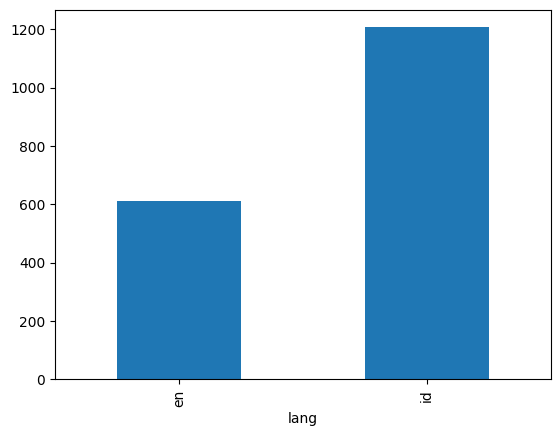

In [6]:
selected_journal.groupby('lang').count().eissn.plot(kind='bar')

In [7]:
tst = selected_journal.sample()[['title', 'desc', 'data_cleaned']]
tst.title.values[-1], tst.desc.values[-1], tst.data_cleaned.values[-1]

('analisa peran auditor internal terhadap kinerja perusahaan dengan pengendalian internal sebagai variabel intervening (studi kasus pada pt semen tonasa)',
 'Abstrak \nPenelitian ini bertujuan untuk mengidentifikasi dan menganalisis (1) pengaruh Peran Auditor Internal secara parsial terhadap efektivitas Pengendalian Internal di PT Semen Tonasa (2) pengaruh Pengendalian Internal secara parsial terhadap kinerja PT Semen Tonasa (3) pengaruh Peran Auditor Internal secara parsial terhadap kinerja PT Semen Tonasa dan (4) pengaruh Peran Auditor Internal terhadap kinerja PT Semen Tonasa dengan Pengendalian Internal sebagai variabel mediasi. Penelitian ini termasuk penelitian dengan pendekatan penelitian kuantitatif melalui desain deskriptif yaitu metode penelitian yang menjelaskan nilai suatu variabel dengan mengolah data-data yang ada kedalam suatu angka dan pada tahap analisis data menggunakan statistic deskriptif untuk membuktikan hipotesis yang telah dirumuskan dapat terbukti atau tidak. H

In [8]:
le = LabelEncoder()

selected_journal['label'] = le.fit_transform(selected_journal.eissn)
selected_journal

C:\Users\rarmn\AppData\Local\Temp\ipykernel_8580\659796985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal['label'] = le.fit_transform(selected_journal.eissn)


,jid,eissn,desc,title,date,data_cleaned,lang,label
75498,12955,25988301,Penelitian ini bertujuan untuk menguji pengaru...,"pengaruh fee audit, audit tenure, komite audi...",2023-10-23,"pengaruh fee audit, audit tenure, komite audi...",id,0
75499,12955,25988301,Ayam broiler merupakan salah satu komoditas ut...,analisis ekonomi dan risiko usaha peternakan a...,2023-07-20,analisis ekonomi dan risiko usaha peternakan a...,en,0
75500,12955,25988301,Penelitian ini bertujuan untuk men...,analisis kebutuhan pengembangan media pembelaj...,2023-05-07,analisis kebutuhan pengembangan media pembelaj...,id,0
75501,12955,25988301,In marketing it is known that after consumer p...,analisis strategi pemasaran melalui pemasar...,2023-02-16,analisis strategi pemasaran melalui pemasar...,en,0
75502,12955,25988301,"Pengaruh Return On Equity (ROE), Return On Inv...","pengaruh return on equity (roe), return on inv...",2020-12-25,"pengaruh return on equity (roe), return on inv...",id,0
...,...,...,...,...,...,...,...,...
77313,12955,25988301,Abstrak \nPT. Martindo Fine Foods adalah sebua...,penerapan strategi komunikasi pemasaran pada p...,2022-06-07,penerapan strategi komunikasi pemasaran pada p...,id,0
77314,12955,25988301,Investment decisions of Batam City students oc...,"analisis literasi keuangan, sikap keuangan, da...",2023-05-30,"analisis literasi keuangan, sikap keuangan, da...",en,0
77315,12955,25988301,Penelitian bertujuan untuk menyusun strategi p...,strategi penyaluran kredit pertanian program b...,2023-06-03,strategi penyaluran kredit pertanian program b...,id,0
77316,12955,25988301,Penelitian ini bertujuan untuk mengetahui Peng...,pengaruh organizational culture terhadap innov...,2023-04-03,pengaruh organizational culture terhadap innov...,id,0


In [9]:
selected_journal_en = selected_journal[selected_journal.lang == 'en']
selected_journal_id = selected_journal[selected_journal.lang == 'id']

model_checkpoint = 'bert-base-cased'
model_checkpoint2 = 'indobenchmark/indobert-base-p1'

selected_journal_en.data_cleaned.sample().values[-1], selected_journal_id.data_cleaned.sample().values[-1]

('the effect of achievement motivation training and religiosity on learning achievement for indonesian muslim university students the purpose of this study is to ascertain the impact of training in accomplishment motivation religiosity on learning achievement for indonesian muslim university students quantitative research is the method employed students from the faculty of economics and business made up the studys population at the indonesian muslim university and the sample was taken using a purposive sampling technique multiple linear regression analysis methods the traditional assumption test the r test and the t test were employed in the data analysis the findings of this study demonstrate that religiousness has a big impact on learning performance and that achievement motivation training has a large impact on both student success in the faculty of economics muslim university of indonesia   keywords achievement motivation training religiosity and learning achievement',
 'pengaruh m

In [10]:
# embedding_en = embed(selected_journal_en, model_checkpoint, device = device)
# embedding_id = embed(selected_journal_id, model_checkpoint2, device = device)

model_bert = BertClassifierEmbed(12, model_checkpoint)
checkpoint_bert = torch.load('model/bert_pipeline03_02.pt')
model_bert.load_state_dict(checkpoint_bert)

model_indobert = BertClassifierEmbed(12, model_checkpoint2)
checkpoint_indobert = torch.load('model/indobert_pipeline03_02.pt')
model_indobert.load_state_dict(checkpoint_indobert)

embedding_en = embed(selected_journal_en, model_checkpoint, model_bert, device = device)
embedding_id = embed(selected_journal_id, model_checkpoint2, model_indobert, device = device)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [11]:
embedding_en.shape, embedding_id.shape

((612, 256, 768), (1206, 256, 768))

In [12]:
embeddings = np.append(embedding_en, embedding_id, axis = 0)
embeddings.shape

(1818, 256, 768)

In [13]:
X = embeddings.reshape(embeddings.shape[0], -1)

pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X)

X.shape

(1818, 2)

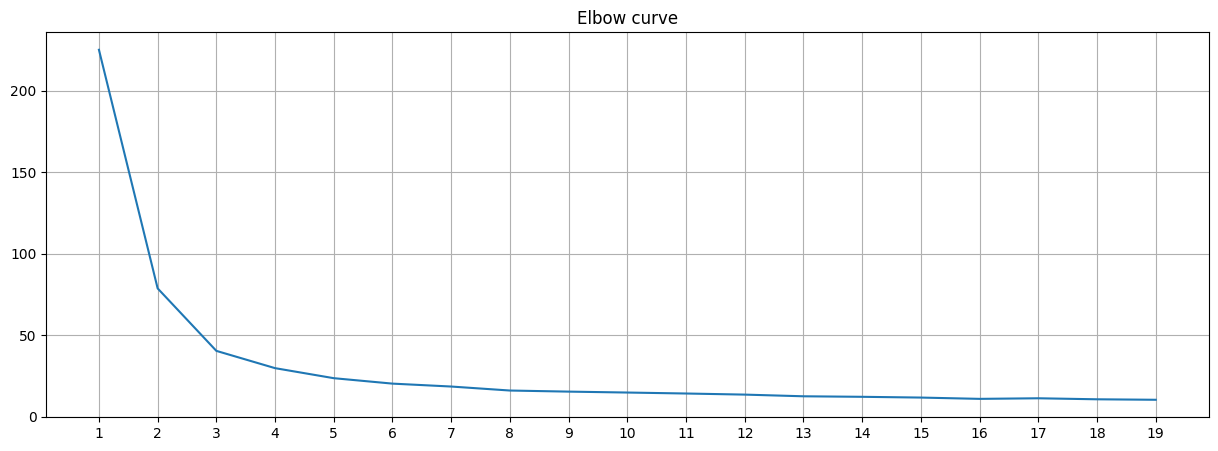

In [14]:
from scipy.spatial.distance import cdist

def elbow_method2(dataset):
    res = list()
    n_cluster = range(1,20)
    for n in n_cluster:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(dataset)
        res.append(np.average(np.min(cdist(dataset, kmeans.cluster_centers_, 'euclidean'), axis=1)))

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(1, 20), res)
    plt.xticks(range(1, 20))
    plt.grid(True)
    plt.title('Elbow curve')

elbow_method2(X)

Best K: 3


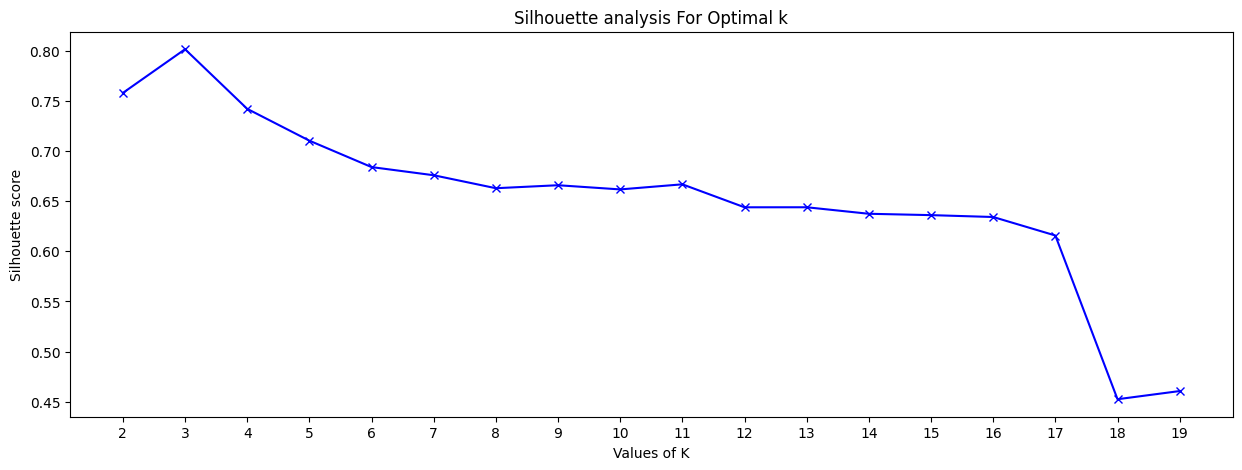

In [15]:
from sklearn.metrics import silhouette_score

def silhouette_method(dataset):
    silhouette_avg = []
    for num_clusters in list(range(2,20)):
        kmeans = KMeans(n_clusters=num_clusters, init = "k-means++", n_init = 10)
        kmeans.fit_predict(dataset)
        score = silhouette_score(dataset, kmeans.labels_)
        silhouette_avg.append(score)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(np.arange(2,20),silhouette_avg,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    _ = plt.xticks(np.arange(2,20))

    print (f"Best K: {np.argmax(silhouette_avg)+2}")

    return np.argmax(silhouette_avg)+2

best_n = silhouette_method(X)

In [16]:
lang = list(selected_journal_en.lang) + list(selected_journal_id.lang)

In [17]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=1000)
kmeans.fit(X)

cluster_labels = kmeans.labels_

# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = centroid_dist(kmeans, X)

# Menentukan batas jarak yang dianggap sebagai "outscoop"
threshold = outscoop_threshold(jarak_ke_centroid)

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= threshold]
outscoop_data = X[jarak_ke_centroid > threshold]

scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > threshold] = -1


d:\GitHub\Jurnal-Clustering\functions.py:51: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


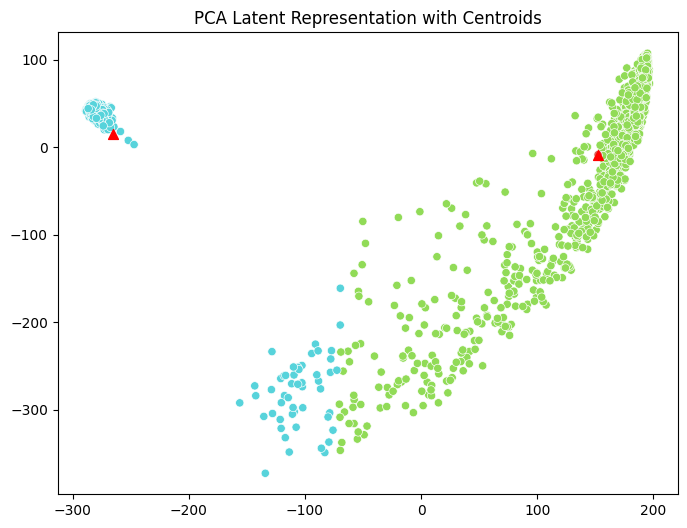

d:\GitHub\Jurnal-Clustering\functions.py:51: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


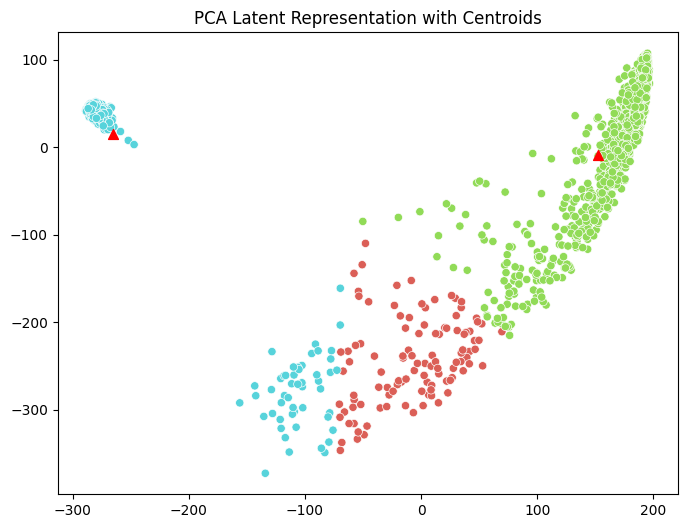

d:\GitHub\Jurnal-Clustering\functions.py:51: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


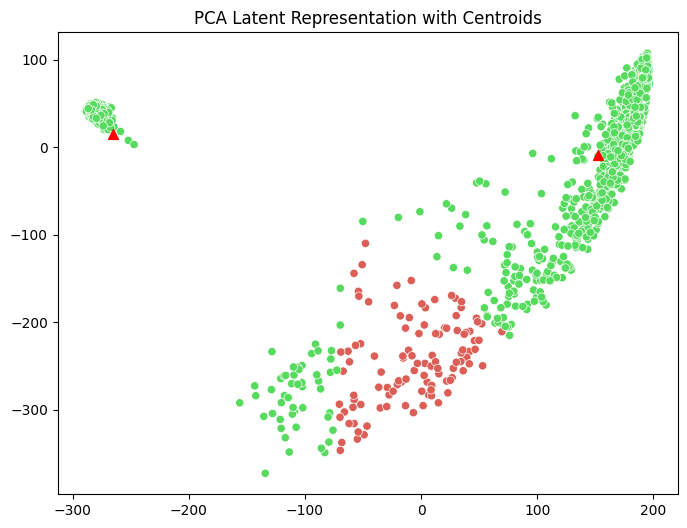

d:\GitHub\Jurnal-Clustering\functions.py:51: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


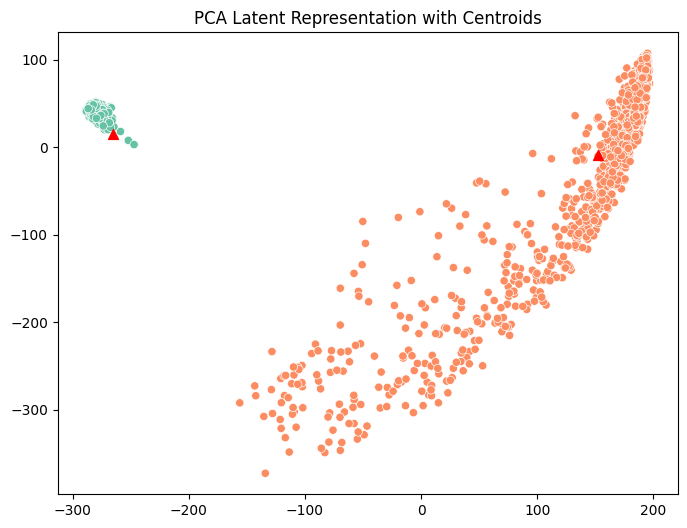

In [18]:
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop=False)
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop=True)
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='focus')
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='lang', lang=lang)

In [19]:
save_data(f'{selected_eissn}_1_3', 'pipeline_3', kmeans, threshold, X, embeddings, selected_journal.data_cleaned, scoop_labels)


Model Kmeans berhasil disimpan
Threshold telah disimpan.
Data sebaran PCA telah disimpan.
Data sebaran PCA telah disimpan.


In [21]:
jurnal_id = f'{selected_eissn}_1_3'
jurnal_type = 'pipeline_3'

kmeans, threshold, X, embeddings, df_res = load_data(jurnal_id, jurnal_type)
scoop_labels = df_res.Label

In [23]:
df_res[df_res.Label == -1].to_csv(f'outscoop_{selected_eissn}_1_3.csv', index=False)


d:\GitHub\Jurnal-Clustering\functions.py:51: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


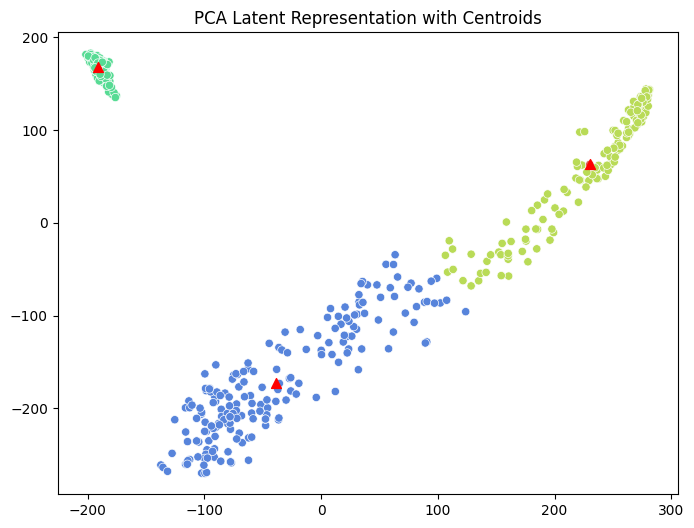

In [ ]:
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop=False)

In [ ]:
selected_journal_id['scoop'] = list(scoop_labels[:len(selected_journal_id)])
selected_journal_en['scoop'] = list(scoop_labels[len(selected_journal_id):])

C:\Users\rarmn\AppData\Local\Temp\ipykernel_18176\573103879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal_id['scoop'] = list(scoop_labels[:len(selected_journal_id)])
C:\Users\rarmn\AppData\Local\Temp\ipykernel_18176\573103879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal_en['scoop'] = list(scoop_labels[len(selected_journal_id):])


In [ ]:
selected_journal_id

,jid,eissn,desc,title,date,data_cleaned,lang,label,scoop
210447,18473,26543915,"Dalam konteks perusahaan start-up, dinamika ke...",dinamika kepemimpinan transformasional dalam m...,2024-05-02,dinamika kepemimpinan transformasional dalam m...,id,0,1.0
210449,18473,26543915,Kabupaten samosir merupakan daerah yang berpot...,implementasi peraturan pemerintah nomor 27 tah...,2022-11-09,implementasi peraturan pemerintah nomor 27 tah...,id,0,1.0
210450,18473,26543915,Air preheater B Tipe Ljungstrom adalah jenis A...,analisis efektivitas alat penukar kalor air pr...,2024-02-29,analisis efektivitas alat penukar kalor air pr...,id,0,1.0
210451,18473,26543915,Dengan makin berkembangnya ilmu pengetahuan da...,perancangan mesin pengayak pasir dengan kapasi...,2018-10-03,perancangan mesin pengayak pasir dengan kapasi...,id,0,1.0
210452,18473,26543915,Studi ini bertujuan untuk mengetahui perlindun...,analisis hukum terhadap sertifikat atas kesala...,2022-07-14,analisis hukum terhadap sertifikat atas kesala...,id,0,1.0
...,...,...,...,...,...,...,...,...,...
211135,18473,26543915,Website Selain berfungsi sebagai sarana inform...,sistem informasi pemesanan perbaikan kendaraaa...,2022-10-31,sistem informasi pemesanan perbaikan kendaraaa...,id,0,1.0
211136,18473,26543915,Mengabadikan setiap momen penting dalam hidup ...,kompilasi expresi dokumentasi persalinan pada...,2024-02-21,kompilasi expresi dokumentasi persalinan pada...,id,0,1.0
211137,18473,26543915,Asuransi ialah yang memberikan pembayaran seju...,penyelesaian klaim asuransi jiwa pada pt. prud...,2022-04-20,penyelesaian klaim asuransi jiwa pada pt. prud...,id,0,1.0
211138,18473,26543915,Penelitian berjudul “Komunikasi Antarpribadi G...,komunikasi antarpribadi guru bimbingan konseli...,2023-12-26,komunikasi antarpribadi guru bimbingan konseli...,id,0,1.0


In [ ]:
print('scoop labels indonesia model : \n {} \n\nscoop labels english model : \n {}'.format(selected_journal_id.groupby('scoop').count().jid, selected_journal_en.groupby('scoop').count().jid))

scoop labels indonesia model : 
 scoop
-1.0     14
 1.0    329
Name: jid, dtype: int64 

scoop labels english model : 
 scoop
-1.0      9
 1.0    133
Name: jid, dtype: int64
